# GVB Visualization

## Imports

In [2]:
import pandas as pd
import datetime

#Visualizations
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Import Files

In [13]:
#Full GVB Dataset
gvb_df = pd.read_csv("../../../Data_thesis/Full_Datasets/GVB.csv")

In [14]:
gvb_df.head()

,Date,Hour,NieuwmarktCode,NieuwmarktLat,NieuwmarktLon,NieuwmarktArrivals,NieuwmarktDepartures,NieuwezijdsCode,NieuwezijdsLat,NieuwezijdsLon,...,DamLon,DamArrivals,DamDepartures,SpuiCode,SpuiLat,SpuiLon,SpuiArrivals,SpuiDepartures,weekday,is_weekend
0,2018-01-01,100,NMT,52.371942,4.901239,11.0,340.0,5069,52.376288,4.893731,...,4.89008,0.0,0.0,5062,52.369097,4.889259,0.0,0.0,0,0
1,2018-01-01,200,NMT,52.371942,4.901239,48.0,175.0,5069,52.376288,4.893731,...,4.89008,21.0,39.0,5062,52.369097,4.889259,0.0,0.0,0,0
2,2018-01-01,300,NMT,52.371942,4.901239,10.0,137.0,5069,52.376288,4.893731,...,4.89008,13.0,48.0,5062,52.369097,4.889259,0.0,0.0,0,0
3,2018-01-01,400,NMT,52.371942,4.901239,16.0,48.0,5069,52.376288,4.893731,...,4.89008,0.0,34.0,5062,52.369097,4.889259,0.0,0.0,0,0
4,2018-01-01,500,NMT,52.371942,4.901239,17.0,56.0,5069,52.376288,4.893731,...,4.89008,0.0,20.0,5062,52.369097,4.889259,0.0,0.0,0,0


## Plot Crowdedness counts per station

### Variables

In [42]:
#Nieuwmarkt
niew_arr = {}
niew_dep = {}

#Nieuwezijds
nwz_arr = {}
nwz_dep = {}

#Dam
dam_arr = {}
dam_dep = {}

#Spui
spui_arr = {}
spui_dep = {}

### Construct Dict

In [54]:
gvb_dict = gvb_df.to_dict("index")

for k, v in gvb_dict.items():
    
    #Combine date and time
    t = int(v["Hour"]/100)
    v["Date"] = pd.Timestamp.strptime(v["Date"], "%Y-%m-%d")
    d = datetime.datetime.combine(v["Date"], datetime.time(t,0))
    
    #Nieuwmarkt
    niew_arr[d] = v["NieuwmarktArrivals"]
    niew_dep[d] = v["NieuwmarktDepartures"]
    
    #Nieuwezijds
    nwz_arr[d] = v["NieuwezijdsArrivals"]
    nwz_dep[d] = v["NieuwezijdsDepartures"]
    
    #Dam
    dam_arr[d] = v["DamArrivals"]
    dam_dep[d] = v["DamDepartures"]
    
    #Spui
    spui_arr[d] = v["SpuiArrivals"]
    spui_dep[d] = v["SpuiDepartures"]
    
#Nieuwmarkt
niew_arr_series = pd.Series(niew_arr)
niew_dep_series = pd.Series(niew_dep)

#Nieuwezijds
nwz_arr_series = pd.Series(nwz_arr)
nwz_dep_series = pd.Series(nwz_dep)

#Dam
dam_arr_series = pd.Series(dam_arr)
dam_dep_series = pd.Series(dam_dep)

#Spui
spui_arr_series = pd.Series(spui_arr)
spui_dep_series = pd.Series(spui_dep)

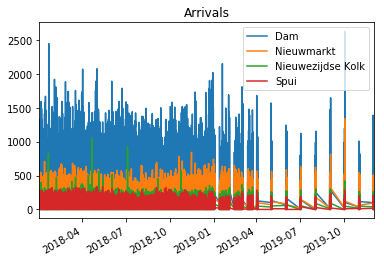

In [70]:
dam_arr_series.plot(legend=True, title='Arrivals', label="Dam")
niew_arr_series.plot(legend=True, label="Nieuwmarkt")
nwz_arr_series.plot(legend=True, label="Nieuwezijdse Kolk")
spui_arr_series.plot(legend=True, label="Spui")
plt.show()

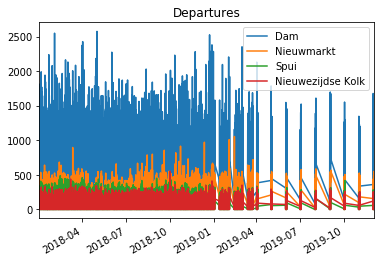

In [76]:
dam_dep_series.plot(legend=True, title='Departures', label="Dam")
niew_dep_series.plot(legend=True, label="Nieuwmarkt")
spui_dep_series.plot(legend=True, label="Spui")
nwz_dep_series.plot(legend=True, label="Nieuwezijdse Kolk")
plt.show()